## Effect of batch size notebook

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
from copy import deepcopy
import random
import sys
import time
from typing import List
from pprint import PrettyPrinter
pp = PrettyPrinter(indent=4)

# get an absolute path to the directory that contains parent files
__file__ = globals()['_dh'][0]
project_dir = __file__ = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(
    project_dir, '..', '..', '..')))

from experiments.utils.constants import (
    PIPLINES_PATH,
    NODE_PROFILING_CONFIGS_PATH,
    NODE_PROFILING_RESULTS_STATIC_PATH
)
from experiments.utils.loader import Loader

In [4]:
series = 31
experiment_id = 2
config_key_mapper = "key_config_mapper.csv"

series_path = os.path.join(
    NODE_PROFILING_RESULTS_STATIC_PATH,
    'series',
    str(series))
loader1 = Loader(
    series_path=series_path, config_key_mapper=config_key_mapper, second_node=False, type_of='node')
loader2 = Loader(
    series_path=series_path, config_key_mapper=config_key_mapper, second_node=False, type_of='node_with_log')
results_1 = loader1.result_processing()
results_2 = loader2.result_processing()
key_config_df = loader1.key_config_mapper()
# print(results.columns)
# print(key_config_df.columns)
# results
display(key_config_df)

excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!


,experiment_id,pipeline_name,node_name,model_variant,cpu_request,memory_request,max_batch_size,max_batch_time,load,load_duration,series,series_meta,replicas,no_engine
0,1,6-mlserver-mock,mock-one,0,4,8Gi,1,1,1,60,31,none-containerized,1,False
1,2,6-mlserver-mock,mock-one,0,4,8Gi,1,1,40,60,31,none-containerized,1,False
2,3,6-mlserver-mock,mock-one,0,4,8Gi,1,1,100,60,31,none-containerized,1,False
3,4,6-mlserver-mock,mock-one,0,4,8Gi,5,1,1,60,31,none-containerized,1,False
4,5,6-mlserver-mock,mock-one,0,4,8Gi,5,1,40,60,31,none-containerized,1,False
5,6,6-mlserver-mock,mock-one,0,4,8Gi,5,1,100,60,31,none-containerized,1,False
6,7,6-mlserver-mock,mock-one,2,4,8Gi,1,1,1,60,31,none-containerized,1,False
7,8,6-mlserver-mock,mock-one,2,4,8Gi,1,1,40,60,31,none-containerized,1,False
8,9,6-mlserver-mock,mock-one,2,4,8Gi,1,1,100,60,31,none-containerized,1,False
9,10,6-mlserver-mock,mock-one,2,4,8Gi,5,1,1,60,31,none-containerized,1,False


In [5]:
results_1.keys()

Index(['experiment_id', 'client_to_model_latencies_avg',
       'client_to_model_latencies_p99', 'client_to_model_latencies_p50',
       'client_to_model_latencies_var', 'client_to_model_latencies_max',
       'client_to_model_latencies_min', 'model_latencies_avg',
       'model_latencies_p99', 'model_latencies_p50', 'model_latencies_var',
       'model_latencies_max', 'model_latencies_min',
       'model_to_client_latencies_avg', 'model_to_client_latencies_p99',
       'model_to_client_latencies_p50', 'model_to_client_latencies_var',
       'model_to_client_latencies_max', 'model_to_client_latencies_min',
       'start_time', 'end_time', 'duration', 'timeout_count',
       'cpu_usage_count_avg', 'cpu_usage_count_p99', 'cpu_usage_count_p50',
       'cpu_usage_count_var', 'cpu_usage_count_max', 'cpu_usage_count_min',
       'cpu_usage_rate_avg', 'cpu_usage_rate_p99', 'cpu_usage_rate_p50',
       'cpu_usage_rate_var', 'cpu_usage_rate_max', 'cpu_usage_rate_min',
       'cpu_throttled_coun

In [6]:
results_2.keys()

Index(['experiment_id', 'client_to_svc_latencies_avg',
       'client_to_svc_latencies_p99', 'client_to_svc_latencies_p50',
       'client_to_svc_latencies_var', 'client_to_svc_latencies_max',
       'client_to_svc_latencies_min', 'svc_latencies_avg', 'svc_latencies_p99',
       'svc_latencies_p50', 'svc_latencies_var', 'svc_latencies_max',
       'svc_latencies_min', 'svc_to_model_latencies_avg',
       'svc_to_model_latencies_p99', 'svc_to_model_latencies_p50',
       'svc_to_model_latencies_var', 'svc_to_model_latencies_max',
       'svc_to_model_latencies_min', 'model_latencies_avg',
       'model_latencies_p99', 'model_latencies_p50', 'model_latencies_var',
       'model_latencies_max', 'model_latencies_min',
       'model_to_client_latencies_avg', 'model_to_client_latencies_p99',
       'model_to_client_latencies_p50', 'model_to_client_latencies_var',
       'model_to_client_latencies_max', 'model_to_client_latencies_min',
       'start_time', 'end_time', 'duration', 'timeout_cou

In [7]:
configs = loader1.load_configs()
for config_name, config in configs.items():
    print(f"File name: {config_name}")
    pp.pprint(config) 

File name: 0.yaml
{   'cpu_request': ['4'],
    'data_type': 'audio',
    'max_batch_size': ['1', '5'],
    'max_batch_time': ['1'],
    'memory_request': ['8Gi'],
    'model_variants': ['0', '2'],
    'no_engine': False,
    'node_name': 'mock-one',
    'pipeline_name': '6-mlserver-mock',
    'repetition': 1,
    'replicas': [1],
    'series': 31,
    'series_meta': 'none-containerized',
    'timeout': 150,
    'workload_config': {'load_duration': 60, 'loads_to_test': [1, 40, 100]},
    'workload_type': 'static'}


excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!


,model_variant,max_batch_size,cpu_request,load,client_to_model_latencies_avg,model_latencies_avg,model_to_client_latencies_avg
0,0,1,4,1,0.151362,0.008436,0.011451
1,0,1,4,40,43.042809,0.008810,5.414882
2,0,1,4,100,142.227073,0.008636,5.276534
3,0,5,4,1,1.090830,0.010308,0.017135
4,0,5,4,40,89.914351,0.017239,6.181916
5,0,5,4,100,273.902015,0.019199,6.706316


Text(0, 0.5, 'Latency (seconds)')

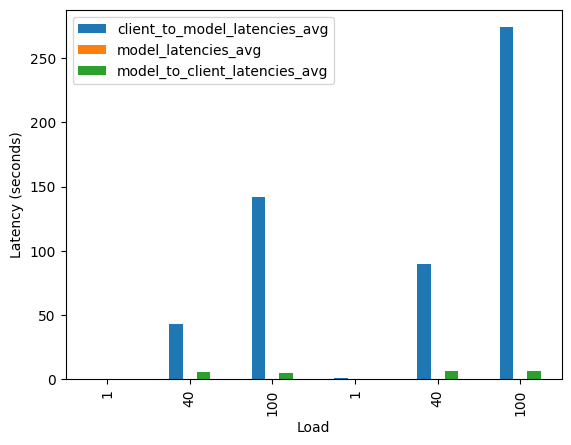

In [8]:
model_variant = 0
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'cpu_request', 'load']
results_columns = ['client_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg']
output = loader1.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='load', y=['client_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg'])
ax.set_xlabel("Load")
ax.set_ylabel("Latency (seconds)")

excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!


,model_variant,max_batch_size,cpu_request,load,client_to_svc_latencies_avg,svc_latencies_avg,svc_to_model_latencies_avg,model_latencies_avg,model_to_client_latencies_avg
0,0,1,4,1,0.002899,0.062397,-0.008436,0.008436,0.011451
1,0,1,4,40,42.571243,0.054029,-0.008810,0.008810,5.414882
2,0,1,4,100,144.277980,-2.390322,-0.008636,0.008636,5.276534
3,0,5,4,1,-1449.456801,0.062397,-0.010308,0.010308,0.017135
4,0,5,4,40,-968.737251,-0.275666,-0.017239,0.017239,6.181916
5,0,5,4,100,-1400.684224,-1.499160,-0.019199,0.019199,6.706316


Text(0, 0.5, 'Latency (seconds)')

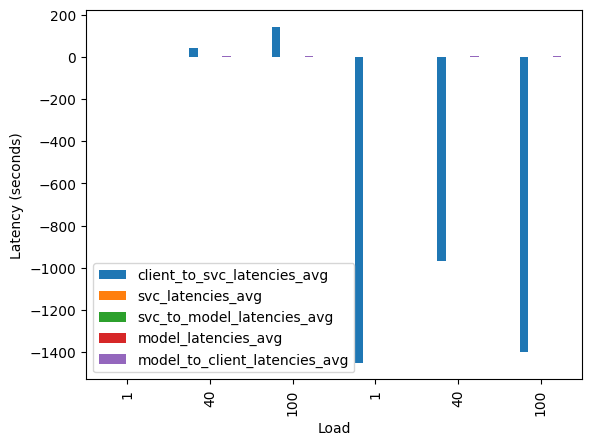

In [9]:
model_variant = 0
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'cpu_request', 'load']
results_columns = ['client_to_svc_latencies_avg', 'svc_latencies_avg', 'svc_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg']
output = loader2.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='load', y=['client_to_svc_latencies_avg', 'svc_latencies_avg', 'svc_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg'])
ax.set_xlabel("Load")
ax.set_ylabel("Latency (seconds)")